In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 16.3 MB/s eta 0:00:00


In [4]:
class AgentState(TypedDict):
  number1:int
  operation:str
  number2:int
  finalNumber:int

In [10]:
def adder(state:AgentState)->AgentState:
  """This node adds the 2 numbers"""
  state['finalNumber']=state['number1']+state['number2']
  return state

def subtractor(state:AgentState)->AgentState:
  """This node subtracts the 2 numbers"""
  state['finalNumber'] = state['number1']-state['number2']
  return state

def decide_next_node(state:AgentState)->AgentState:
  """This node will select the next node of the graph"""

  if state['operation']=="+":
    return "addition_operation"
  elif state['operation']=="-":
    return "subtraction_operation"

graph = StateGraph(AgentState)
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
# graph.add_node("router",decide_next_node) this is a wrong way bcoz this doesn't change the state, it returns the edge
graph.add_node("router",lambda state:state) #passthrough function

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge: Node
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node"
    }
)

graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

app=graph.compile()

In [13]:
initial_state_1 = AgentState(number1=20,operation="-",number2=10)
print(app.invoke(initial_state_1))

{'number1': 20, 'operation': '-', 'number2': 10, 'finalNumber': 10}


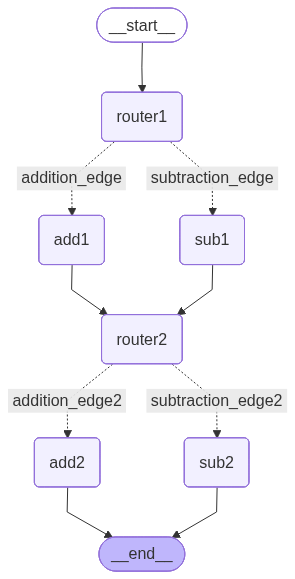

In [15]:
#Exercise

class AgentState2(TypedDict):
  number1:int
  operation:str
  number2:int
  number3:int
  operation2:str
  number4:int
  finalNumber:int
  finalNumber2:int

graph=StateGraph(AgentState2)

def add_numbers1(state:AgentState2)->AgentState2:
  state['finalNumber']=state['number1']+state['number2']
  return state

def subtract_numbers(state:AgentState2)->AgentState2:
  state['finalNumber']=state['number1']-state['number2']
  return state

def add_numbers2(state:AgentState2)->AgentState2:
  state['finalNumber2']=state['number3']+state['number4']
  return state

def subtract_numbers2(state:AgentState2)->AgentState2:
  state['finalNumber2']=state['number3']-state['number4']
  return state

def router(state:AgentState2)->AgentState2:
  if state['operation']=="+":
    return "addition_edge"
  if state['operation']=="-":
    return "subtraction_edge"

def router2(state:AgentState2)->AgentState2:
  if state['operation2']=="+":
    return "addition_edge2"
  if state['operation2']=="-":
    return "subtraction_edge2"


graph=StateGraph(AgentState2)
graph.add_node("add1",add_numbers1)
graph.add_node("sub1",subtract_numbers)
graph.add_node("router1",lambda state:state)

graph.add_edge(START,"router1")

graph.add_conditional_edges(
    "router1",
    router,
    {
        "addition_edge":"add1",
        "subtraction_edge":"sub1"
    }
)

graph.add_node("router2",lambda state:state)

graph.add_edge("add1","router2")
graph.add_edge("sub1","router2")

graph.add_node("add2",add_numbers2)
graph.add_node("sub2",subtract_numbers2)

graph.add_conditional_edges(
    "router2",
    router2,
    {
        "addition_edge2":"add2",
        "subtraction_edge2":"sub2"
    }
)

graph.add_edge("add2",END)
graph.add_edge("sub2",END)

graph.compile()


In [17]:
app=graph.compile()
initial_state=AgentState2(number1=20,number2=10,operation="+",number3=15,number4=5,operation2="-")
app.invoke(initial_state)

{'number1': 20,
 'operation': '+',
 'number2': 10,
 'number3': 15,
 'number4': 5,
 'finalNumber': 30,
 'operation2': '-',
 'finalNumber2': 10}